In [1]:
from data_prep import *
from PositionModel import *
from PlayerModel import *
from commons import *
import shap
from sklearn.ensemble import RandomForestRegressor

In [2]:
features = ['goals_scored_avg5', 'xG_avg5', 'assists_fpl_avg5',
       'bonus_avg5', 'bps_avg5', 'clean_sheets_avg5', 'goals_conceded_avg5',
       'shots_avg5', 'xGBuildup_avg5', 'xGChain_avg5', 'yellow_cards_avg5',
       'red_cards_avg5', 'was_home', 'rating_diff', 'minutes_avg5']
rolling_columns = ['goals_scored', 'xG', 'assists_fpl', 'bonus', 'bps', 'clean_sheets', 'goals_conceded', 'shots', 'xGBuildup', 'xGChain', 'yellow_cards', 'red_cards', 'minutes']
features += ['goals_scored_avg38', 'xG_avg38', 'assists_fpl_avg38',
       'bonus_avg38', 'bps_avg38', 'clean_sheets_avg38', 'goals_conceded_avg38',
       'shots_avg38', 'xGBuildup_avg38', 'xGChain_avg38', 'yellow_cards_avg38']
gameweeks_for_averages = [5, 38]
to_predict = 'total_points'

In [3]:
# loading dataset
# previous_games = merged_understat_and_fpl(rolling_columns, gameweeks_for_averages, True)
previous_games = load_dataset()

In [4]:
previous_games.shape

(10294, 92)

In [5]:
# splitting data
X_train_def = previous_games[previous_games['position_fpl'] == 'DEF'][features]
y_train_def = previous_games[previous_games['position_fpl'] == 'DEF'][to_predict]

X_train_mid = previous_games[previous_games['position_fpl'] == 'MID'][features]
y_train_mid = previous_games[previous_games['position_fpl'] == 'MID'][to_predict]

X_train_fwd = previous_games[previous_games['position_fpl'] == 'FWD'][features]
y_train_fwd = previous_games[previous_games['position_fpl'] == 'FWD'][to_predict]

In [6]:
# general model fitting
position_model = PositionModel()

In [7]:
position_model.def_model.fit(X_train_def, y_train_def)
position_model.mid_model.fit(X_train_mid, y_train_mid)
position_model.fwd_model.fit(X_train_fwd, y_train_fwd)

RandomForestRegressor(random_state=42)

In [8]:
previous_games[previous_games['player_name'] == 'Ben Mee']

,Unnamed: 0.1,Unnamed: 0,index,season,name,position_fpl,team,assists_fpl,bonus,bps,...,xGChain_avg38,yellow_cards_avg38,red_cards_avg38,minutes_avg38,was_played,next_gw,opp_team,team_rating,opp_team_rating,rating_diff
183,7,486,49958,2020,Ben Mee,DEF,Burnley,0,0,0,...,0.042319,0.000000,0.0,0.000000,1,0,Fulham,1873.337769,1661.436523,0.127541
190,14,486,49958,2020,Ben Mee,DEF,Burnley,0,0,0,...,0.042101,0.000000,0.0,0.000000,1,0,Brentford,1872.177490,1718.953369,0.089138
191,13,486,49958,2020,Ben Mee,DEF,Burnley,0,0,0,...,0.045108,0.000000,0.0,0.000000,1,0,Aston Villa,1664.454956,1716.015747,-0.030047
192,12,486,49958,2020,Ben Mee,DEF,Burnley,0,0,0,...,0.046528,0.000000,0.0,0.000000,1,0,Arsenal,1806.040283,1872.177490,-0.035326
193,11,486,49958,2020,Ben Mee,DEF,Burnley,0,0,0,...,0.048031,0.000000,0.0,0.000000,1,0,Liverpool,1806.040283,1982.519897,-0.089018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,530,50184,1254,2022,Ben Mee,DEF,Brentford,0,0,7,...,0.139715,0.026316,0.0,22.842105,1,0,Fulham,1718.953369,1661.436523,0.034619
10135,485,50777,1847,2022,Ben Mee,DEF,Brentford,0,0,17,...,0.099516,0.052632,0.0,17.605263,1,0,Everton,1718.953369,1697.177124,0.012831
10171,531,51379,2449,2022,Ben Mee,DEF,Brentford,0,0,6,...,0.146245,0.026316,0.0,25.210526,1,0,Crystal Palace,1718.953369,1749.146973,-0.017262
10242,486,51988,3058,2022,Ben Mee,DEF,Brentford,0,0,12,...,0.101629,0.052632,0.0,19.973684,1,0,Leeds,1718.953369,1703.118164,0.009298


In [9]:
previous_games.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'season', 'name', 'position_fpl',
       'team', 'assists_fpl', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW', 'xP', 'a_team', 'goals', 'shots', 'xG', 'time', 'position_und',
       'h_goals', 'a_goals', 'date', 'id', 'xA', 'assists_und', 'key_passes',
       'npg', 'npxG', 'xGChain', 'xGBuildup', 'player_name', 'h_team',
       'goals_scored_avg5', 'xG_avg5', 'assists_fpl_avg5', 'bonus_avg5',
       'bps_avg5', 'clean_sheets_avg5', 'goals_conceded_avg5', 'shots_avg5',
       'xGBuildup_avg5', 'xGChain_avg5'

In [10]:
# getting next gameweek
next_gameweek = get_next_gameweek(previous_games, NEXT_GAMEWEEK, rolling_columns, gameweeks_for_averages)

In [11]:
next_gameweek.shape

(93, 93)

In [12]:
print(next_gameweek[features].iloc[0])

goals_scored_avg5        0.200000
xG_avg5                  0.110257
assists_fpl_avg5         0.400000
bonus_avg5               0.600000
bps_avg5                14.800000
clean_sheets_avg5        0.000000
goals_conceded_avg5      1.400000
shots_avg5               1.200000
xGBuildup_avg5           0.087882
xGChain_avg5             0.338437
yellow_cards_avg5        0.000000
red_cards_avg5           0.000000
was_home                 0.000000
rating_diff              0.000620
minutes_avg5            66.200000
goals_scored_avg38            NaN
xG_avg38                      NaN
assists_fpl_avg38             NaN
bonus_avg38                   NaN
bps_avg38                     NaN
clean_sheets_avg38            NaN
goals_conceded_avg38          NaN
shots_avg38                   NaN
xGBuildup_avg38               NaN
xGChain_avg38                 NaN
yellow_cards_avg38            NaN
Name: 73, dtype: float64


In [13]:
# removing NaNs
next_gameweek = next_gameweek.dropna(subset = features)

In [14]:
next_gameweek.shape

(41, 93)

In [15]:
next_gameweek_gk = next_gameweek[next_gameweek['position_fpl'] == 'GK']
next_gameweek_def = next_gameweek[next_gameweek['position_fpl'] == 'DEF']
next_gameweek_mid = next_gameweek[next_gameweek['position_fpl'] == 'MID']
next_gameweek_fwd = next_gameweek[next_gameweek['position_fpl'] == 'FWD']

In [16]:
def get_shap_index_by_name(df, name):
    index = 0
    for i, r in df.iterrows():
        if r['name'] == name:
            return index
        index += 1
    return None

# DEFENDERS

In [17]:
# predicting
pred_points = position_model.def_model.predict(next_gameweek_def[features])

In [18]:
predictions = next_gameweek_def
predictions.insert(1, 'pred_points', pred_points)
predictions = predictions.sort_values(by = 'pred_points', ascending = False)

In [19]:
predictions[['name', 'was_home', 'opp_team_rating', 'pred_points']].head(20)

,name,was_home,opp_team_rating,pred_points
72,Eric Dier,0,1872.177490,5.49
31,Trent Alexander-Arnold,1,1779.396606,4.99
92,Conor Coady,0,1664.454956,4.44
68,Fabian Schär,0,1661.436523,3.65
28,Joachim Andersen,1,1853.123535,3.59
47,Timothy Castagne,1,1589.250000,3.45
60,Kyle Walker-Peters,1,1697.177124,2.77
76,Ben Mee,0,1638.479126,0.86


In [20]:
# shap for predictions
explainer_pred = shap.Explainer(position_model.def_model, X_train_def)
shap_values_pred = explainer_pred(next_gameweek_def[features], check_additivity=False)

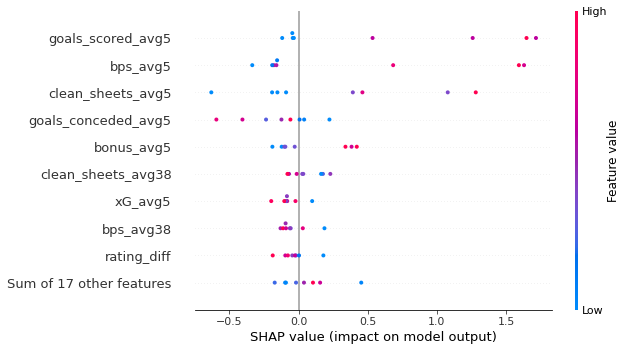

In [21]:
# feature influence
shap.plots.beeswarm(shap_values_pred)

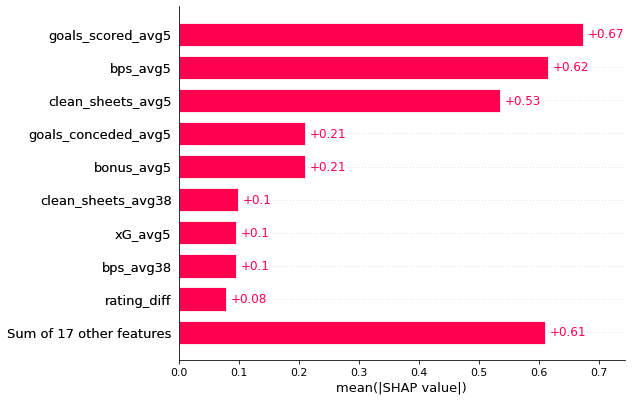

In [22]:
# feature importance
shap.plots.bar(shap_values_pred)

# MIDFIELDERS

In [23]:
# predicting
pred_points = position_model.mid_model.predict(next_gameweek_mid[features])

In [24]:
predictions = next_gameweek_mid
predictions.insert(1, 'pred_points', pred_points)
predictions = predictions.sort_values(by = 'pred_points', ascending = False)

In [25]:
predictions[['name', 'was_home', 'opp_team_rating', 'pred_points']].head(20)

,name,was_home,opp_team_rating,pred_points
46,Alexis Mac Allister,0,1982.519897,8.05
53,Marcus Rashford,0,2030.751709,7.94
50,Pascal Groß,0,1982.519897,7.69
25,Wilfried Zaha,1,1853.123535,7.60
45,Leandro Trossard,0,1982.519897,6.78
74,Pierre-Emile Højbjerg,0,1872.177490,6.48
44,Kevin De Bruyne,1,1806.040283,6.28
40,Raheem Sterling,0,1749.146973,6.25
49,James Maddison,1,1589.250000,6.21
42,Ilkay Gündogan,1,1806.040283,5.99


In [26]:
# shap for predictions
explainer_pred = shap.Explainer(position_model.mid_model, X_train_def)
shap_values_pred = explainer_pred(next_gameweek_mid[features], check_additivity=False)

In [27]:
# shap for previous games
explainer = shap.Explainer(position_model.mid_model, X_train_mid)
shap_values = explainer(X_train_def, check_additivity=False)

 99%|===================| 2536/2550 [00:59<00:00]        

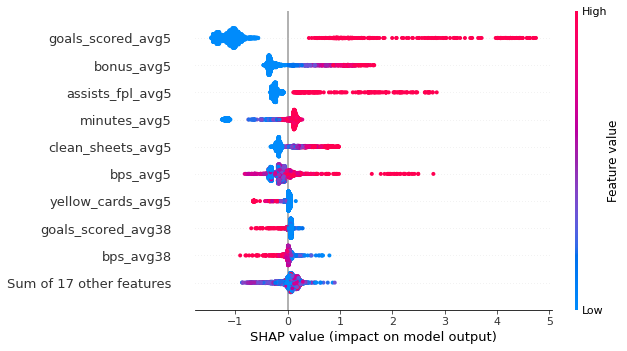

In [28]:
# feature influence
shap.plots.beeswarm(shap_values)

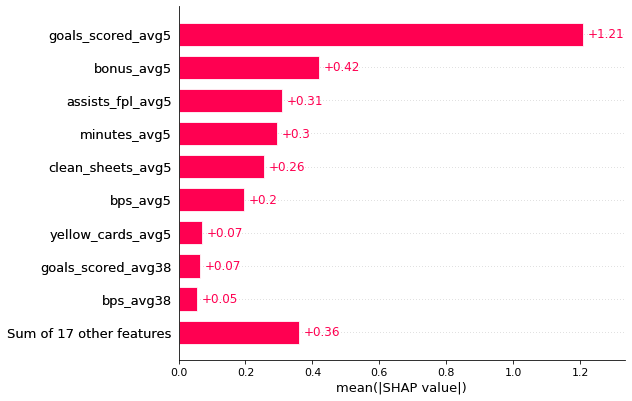

In [29]:
# feature importance
shap.plots.bar(shap_values)

# FORWARDS

In [30]:
# predicting
pred_points = position_model.fwd_model.predict(next_gameweek_fwd[features])

In [31]:
predictions = next_gameweek_fwd
predictions.insert(1, 'pred_points', pred_points)
predictions = predictions.sort_values(by = 'pred_points', ascending = False)

In [32]:
predictions[['name', 'was_home', 'opp_team_rating', 'pred_points']].head(20)

,name,was_home,opp_team_rating,pred_points
70,Harry Kane,0,1872.177490,5.44
85,Neal Maupay,0,1664.454956,5.14
35,Roberto Firmino,1,1779.396606,5.01
57,Che Adams,1,1697.177124,3.96
86,Michail Antonio,1,1703.791260,2.39
62,Danny Ings,0,1703.118164,2.14
36,Kai Havertz,0,1749.146973,1.80
9,Pierre-Emerick Aubameyang,1,1873.337769,0.00


In [33]:
# shap for predictions
explainer_pred = shap.Explainer(position_model.mid_model, X_train_def)
shap_values_pred = explainer_pred(next_gameweek_mid[features], check_additivity=False)

In [34]:
# shap for previous games
explainer = shap.Explainer(position_model.mid_model, X_train_mid)
shap_values = explainer(X_train_def, check_additivity=False)

 99%|===================| 2534/2550 [01:01<00:00]        

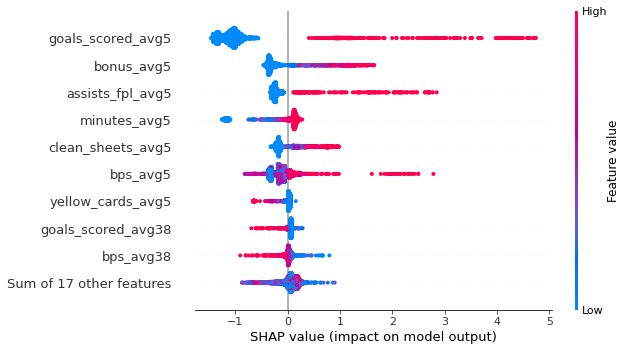

In [35]:
# feature influence
shap.plots.beeswarm(shap_values)

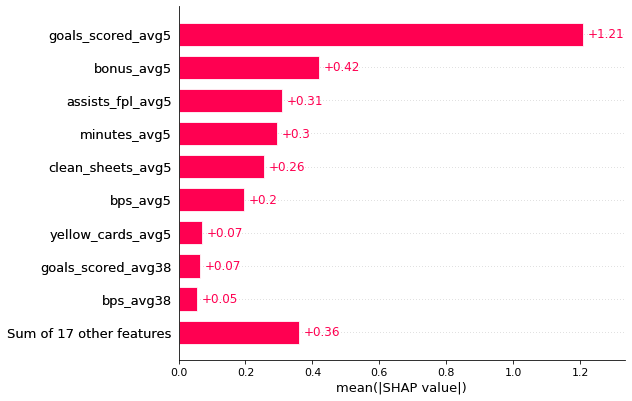

In [36]:
# feature importance
shap.plots.bar(shap_values)